In [1]:
# loading libraries for data manipulation
import numpy as np
import pandas as pd

# loading libraries for data visualization
import matplotlib.pyplot as plt
from plotnine import *

# import tensorflow and keras packages
import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

Let's create a neural network to classify digits from images. The MNIST digits dataset contains 70K images of digits (0-9). This is not an image-classification neural network!

In [2]:
# Load MNIST data from keras.datasets
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


(28, 28)


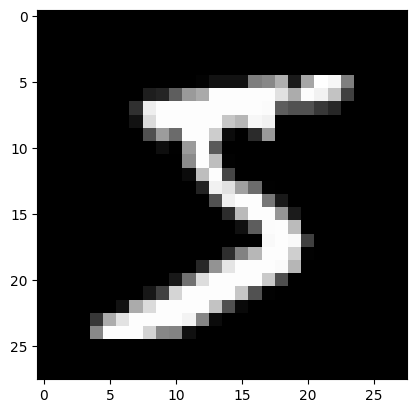

In [3]:
print(X_train_mnist[0].shape)
plt.imshow(X_train_mnist[0], cmap='gray')
plt.show()

While each observation is a 28x28 pixel image, it can be converted into a long 1 dimensional vector of greyscale values. 

In [4]:
# Preprocess: flatten images and normalize pixel values
# reshape(-1,28x28) flattens each image into a 1-dimensional vector of length 28*28
# the -1 here means all items in the object (no need to specify exact amount)
# /255.0 scales a greyscale value between [0-255] into [0-1]  
X_train_mnist = X_train_mnist.reshape(-1, 28*28).astype('float32') / 255.0

print(X_train_mnist[0].shape)

(784,)


Let's build a deep neural network with 1 hidden layer and a new activation function for the output. The softmax function is used for multi-class classification problems. The output layer has the same number of units as the classes, in this instance 10.

In [ ]:
# define function to construct architecture
def create_model():
    # fully connected NNet with 1 hidden layer of 128 nodes
    model = keras.Sequential([
        keras.layers.Dense(128,activation='relu',input_shape=(784,)),
        keras.layers.Dense(10,activation='softmax') # output layer
    ])

    return model

We can now define our optimizer. We also need to define a learning rate and initialize our model.

In [14]:
lr = 0.05

optimizer_name = 'SGD'
optimizer_function = tf.keras.optimizers.SGD(lr)

mnist_sgd_02 = create_model()

Now, we will compile and train our model for 5 epochs. The loss function here is sparse_categorical_crossentropy. This is a variation of categorical_crossentropy when the class is a numerical value instead of a one-hot encoded vector. 

In [ ]:
# commenting out compile and just running fit again will run it using preexisting weights, not reinitialize (doing this can lead to overfitting)
mnist_sgd_02.compile(optimizer=optimizer_function,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

mnist_sgd_02.fit(X_train_mnist, y_train_mnist, epochs=5, batch_size=32, verbose=1)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 932us/step - accuracy: 0.9756 - loss: 0.0884
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 873us/step - accuracy: 0.9779 - loss: 0.0797
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 900us/step - accuracy: 0.9822 - loss: 0.0677
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 863us/step - accuracy: 0.9835 - loss: 0.0601
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 839us/step - accuracy: 0.9844 - loss: 0.0560


### Building blocks of a neural network in Tensorflow/Keras


Let's view the architecture of our model

In [17]:
mnist_sgd_02.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,772 (397.55 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

To predict, we load up an image and run it through the model, getting a probability across all classes as a result. 

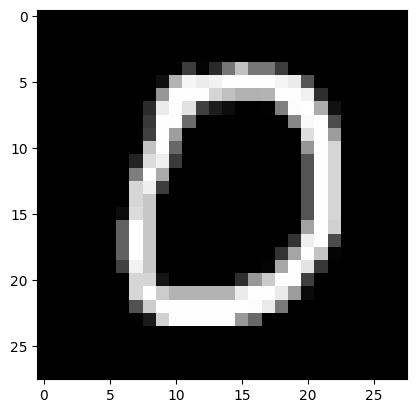

In [18]:
plt.imshow(X_test_mnist[10], cmap='gray')
plt.show()

In [19]:
input_image = X_test_mnist[10].reshape(1, 28*28)/255.0 # changing it to be of the input size (1,784)

predictions = mnist_sgd_02.predict(input_image)

for i in range(10):
    print(f"Probability of digit {i}: {predictions[0][i]:.4f}") 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Probability of digit 0: 0.9998
Probability of digit 1: 0.0000
Probability of digit 2: 0.0001
Probability of digit 3: 0.0000
Probability of digit 4: 0.0000
Probability of digit 5: 0.0000
Probability of digit 6: 0.0000
Probability of digit 7: 0.0000
Probability of digit 8: 0.0000
Probability of digit 9: 0.0001


Try different variations of number of hidden layers (and units), epochs, optimizers, and batch sizes. 

- SGD: tf.keras.optimizers.SGD(learning_rate=lr)
- Momentum: tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.9)
- AdaGrad: tf.keras.optimizers.Adagrad(learning_rate=lr)
- RMSProp: tf.keras.optimizers.RMSprop(learning_rate=lr)
- Adam: tf.keras.optimizers.Adam(learning_rate=lr)

In [ ]:
# copy the code we have written and add variations to it
def create_model2():
    # fully connected NNet with 1 hidden layer of 128 nodes
    model2 = keras.Sequential([
        keras.layers.Dense(128,activation='relu',input_shape=(784,)),
        # keras.layers.Dropout(0.2),
        keras.layers.Dense(10,activation='softmax') # output layer
    ])
    return model2

lr = 0.02

# AdamW performance: accuracy: 0.9441, loss: 0.2173, val_accuracy: 0.9363, val_loss: 0.2614
optimizer_name = 'AdamW'
optimizer_function = tf.keras.optimizers.AdamW(learning_rate=lr, weight_decay=0.01)

# Adam performance: accuracy: 0.9460, loss: 0.2264, val_accuracy: 0.9257, val_loss: 0.3930
# optimizer_name = 'Adam'
# optimizer_function = tf.keras.optimizers.Adam(learning_rate=lr)
mnist_sgd_02 = create_model2()

mnist_sgd_02.compile(optimizer=optimizer_function,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

mnist_sgd_02.fit(X_train_mnist, y_train_mnist, epochs=5, batch_size=32, verbose=1, validation_data=(X_test_mnist, y_test_mnist))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8763 - loss: 0.4252 - val_accuracy: 0.9373 - val_loss: 0.2513
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9349 - loss: 0.2444 - val_accuracy: 0.9341 - val_loss: 0.2412
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9404 - loss: 0.2412 - val_accuracy: 0.9403 - val_loss: 0.2615
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9465 - loss: 0.2288 - val_accuracy: 0.9420 - val_loss: 0.2557
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9460 - loss: 0.2264 - val_accuracy: 0.9257 - val_loss: 0.3930


Separately, let's apply all optimizers to the dataset to see differences in training. 

In [ ]:
# setting up some variables
model_history2 = {}
lr = 0.02

# reshaping testing data
X_test_mnist = X_test_mnist.reshape(-1, 28*28).astype('float32') / 255.0

In [22]:
# dictionary of optimizers
optimizers = {'SGD':tf.keras.optimizers.SGD(lr),
              'Momentum':tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.9),
              'AdaGrad':tf.keras.optimizers.Adagrad(learning_rate=lr),
              'RMSProp':tf.keras.optimizers.RMSprop(learning_rate=lr),
              'Adam':tf.keras.optimizers.Adam(learning_rate=lr)}

# for each optimizer, train a different model
for name,func in optimizers.items():
    print(f"\nTraining with {name}")
    model = create_model()
    model.compile(optimizer=func,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(X_train_mnist, y_train_mnist, epochs=5, batch_size=32, verbose=1, validation_data=(X_test_mnist, y_test_mnist))
    model_history[name] = history.history


Training with SGD
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7909 - loss: 0.7900 - val_accuracy: 0.9169 - val_loss: 0.2981
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9170 - loss: 0.2922 - val_accuracy: 0.9331 - val_loss: 0.2362
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 924us/step - accuracy: 0.9339 - loss: 0.2374 - val_accuracy: 0.9433 - val_loss: 0.2017
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 879us/step - accuracy: 0.9432 - loss: 0.2013 - val_accuracy: 0.9485 - val_loss: 0.1829
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9529 - loss: 0.1716 - val_accuracy: 0.9534 - val_loss: 0.1609

Training with Momentum
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8703 - loss: 0.4221 - val_accuracy: 0.9600 - val_loss: 0.1329
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9640 - loss: 0.1197 - val_accuracy: 0.9702 - val_loss: 0.0943
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/st

history retains all recorded information from a model's training include loss and validation accuracies. Let's plot them to compare each optimizer's impact on the model. 

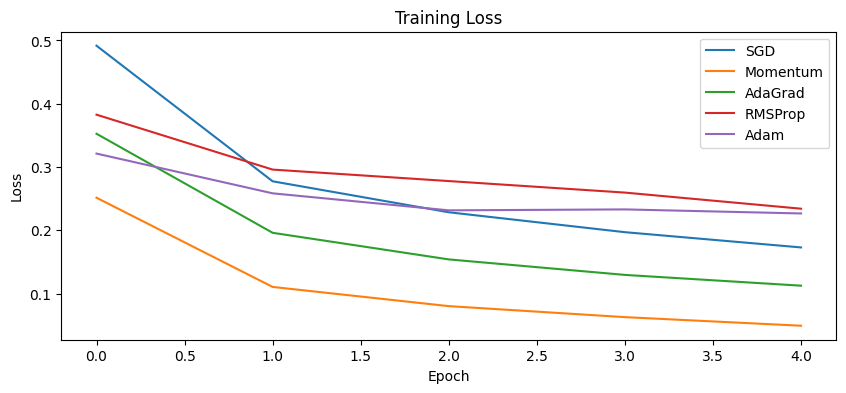

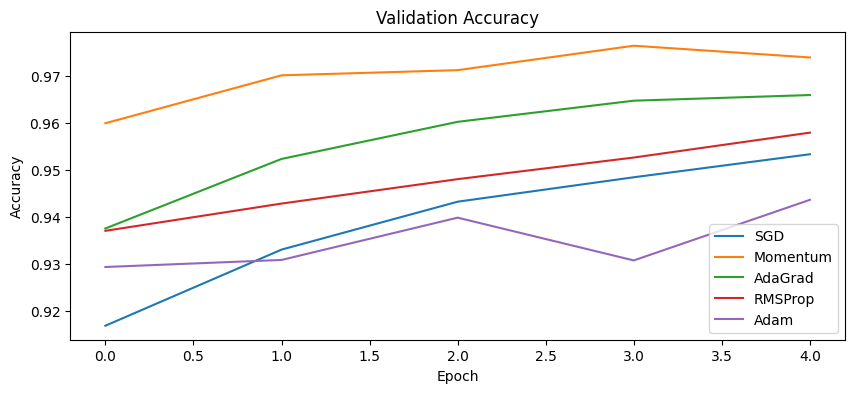

In [23]:
# Loss
plt.figure(figsize=(10, 4))
for name in model_history:
    plt.plot(model_history[name]['loss'], label=f'{name}')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Accuracy
plt.figure(figsize=(10, 4))
for name in model_history:
    plt.plot(model_history[name]['val_accuracy'], label=f'{name}')
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()